In [ ]:
import numpy as np
from scipy.integrate import odeint
import plotly.graph_objects as go

In [ ]:
# Система уравнений:
def FinanceAttractor(XYZ, t, alpha, beta, zeta):
    x, y, z = XYZ
    x_dt = (1/beta - alpha)*x + x*y + z
    y_dt = -beta*y - x**2
    z_dt = -x - zeta*z
    return x_dt, y_dt, z_dt

# Параметры системы и начальные условия:
alpha = 0.001
beta = 0.2
zeta = 1.1

x_0, y_0, z_0 = 0.1, 0, 0

# Максимальное время и общее количество
# временных точек:
tmax, n = 300, 40000

# Интегрируем систему уравнений в каждой точке
# временного интервала t:
t = np.linspace(0, tmax, n)
f = odeint(FinanceAttractor, (x_0, y_0, z_0), t,
           args=(alpha, beta, zeta))
X, Y, Z = f.T

In [ ]:
# Массив, отвечающий за изменение цвета:
c = np.linspace(0, 1, n)

# Готовим данные для отрисовки:
DATA = go.Scatter3d(x=X, y=Y, z=Z,
                    line=dict(color= c,
                              width=3,
                              # Выбираем цветовую палитру:
                              # Greys,YlGnBu,Greens,YlOrRd,Bluered,RdBu,
                              # Reds,Blues,Picnic,Rainbow,Portland,Jet,
                              # Hot,Blackbody,Earth,Electric,Viridis,Cividis.
                              colorscale="Cividis"),
                    #  Рисуем только линии:
                    mode='lines')

fig = go.Figure(data=DATA)    

# Задаем параметры отрисовки:
fig.update_layout(width=1000, height=1000,
                  margin=dict(r=10, l=10, b=10, t=10),
                  # Устанавливаем цвет фона:
                  # paper_bgcolor='rgb(0,0,0)',
                  scene=dict(camera=dict(up=dict(x=0, y=0, z=1),
                                         eye=dict(x=0, y=1, z=1)),
                             # Устанавливаем пропорциональное
                             # соотношение осей друг к другу:
                             aspectratio = dict(x=1, y=1, z=1),
                             # Отображаем, как указано в "aspectratio"
                             aspectmode = 'manual',
                             # Скрываем оси:
                             xaxis=dict(visible=True),
                             yaxis=dict(visible=True),
                             zaxis=dict(visible=True)
                            )
                 )

######################
#!!  ВОСТОРГАЕМСЯ  !!#
######################

fig.show()

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DejaVu Serif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['axes.titlesize'] = 36
plt.rcParams['axes.labelsize'] = 24

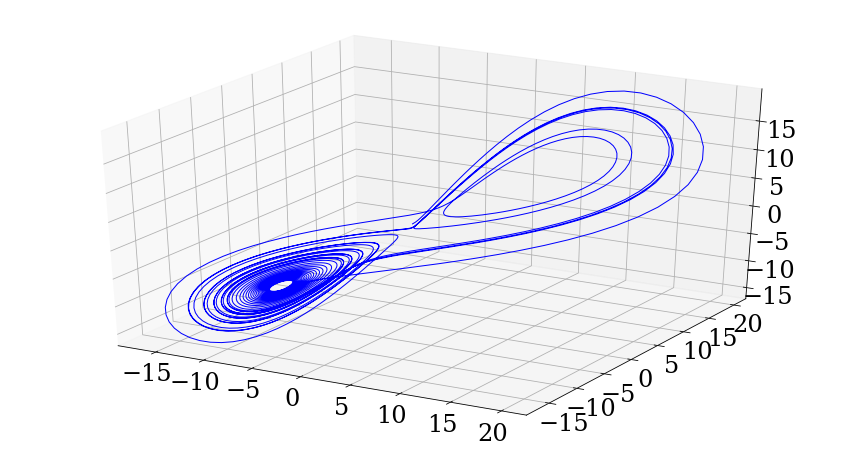

In [ ]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def lorenz(p,t,s,r,b):
    x,y,z = p.tolist()          # Текущее положение безмассовой точки (x, y, z)
    # print("x,y,z,t:",x,y,z,t)   # Помогите разобраться в процессе выполнения odeint
    return s*(y-x),x*(r-z)-y,x*y-b*z # Вернуться к dx / dt, dy / dt, dz / dt

t = np.arange(0,30,0.01)
track1 = integrate.odeint(lorenz,(0.0,1.00,0.0),t,args=(10.0,28.0,2.6))
track2 = integrate.odeint(lorenz,(0.0,1.01,0.0),t,args=(10.0,28.0,2.6))
# print("type(track1):",type(track1),"track1.shape:",track1.shape)

T=5

fig = plt.figure(figsize=(15,8))
ax = fig.gca(projection='3d')   # Получить текущее дополнительное изображение, указать режим 3D
ax.plot(track1[:-2*T,0],track1[T:-T,0],track1[2*T:,0],lw=1.0,color='b')	# Картина траектории 1			
# ax.plot(track2[:,0],track2[:,1],track2[:,2],lw=1.0,color='m')	# Картина траектории 2		
# plt.savefig('attractor_x.png')	
...
plt.show()

In [ ]:
track1.shape

(3000, 3)

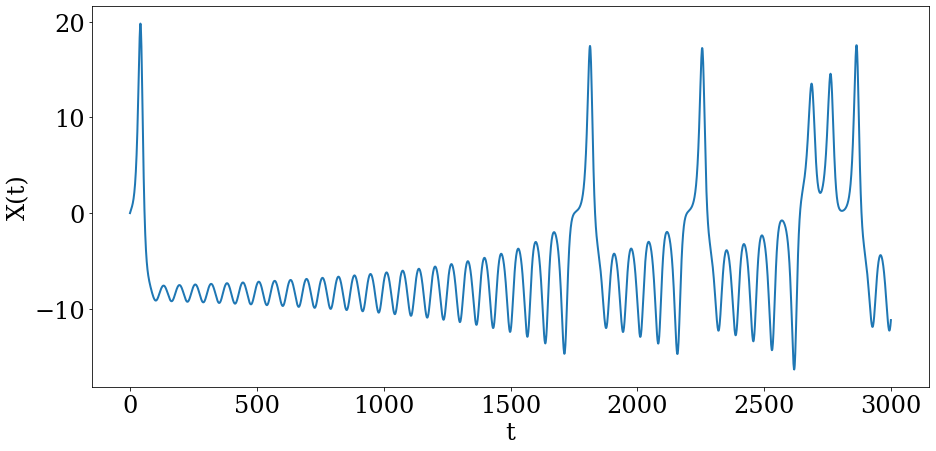

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(np.arange(3000), track1[:,0])
plt.xlabel("t")
plt.ylabel("X(t)")
plt.show()

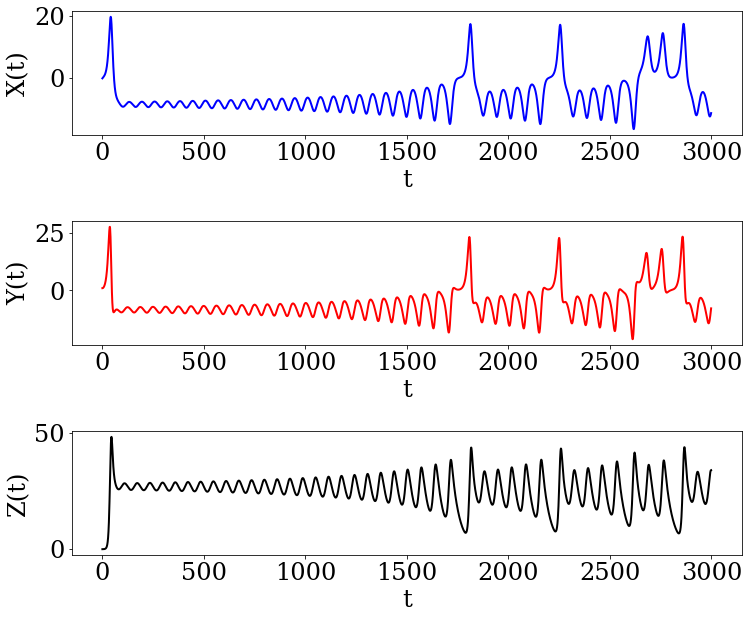

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(12, 10))
ax[0].plot([i for i in range(3000)], track1[:,0], c='b')
ax[0].set_xlabel("t")
ax[0].set_ylabel("X(t)")
ax[1].plot([i for i in range(3000)], track1[:,1], c='r')
ax[1].set_xlabel("t")
ax[1].set_ylabel("Y(t)")
ax[2].plot([i for i in range(3000)], track1[:,2], c='k')
ax[2].set_xlabel("t")
ax[2].set_ylabel("Z(t)")
plt.subplots_adjust(hspace=0.7)
plt.savefig('ts_xyz.png')
plt.show()

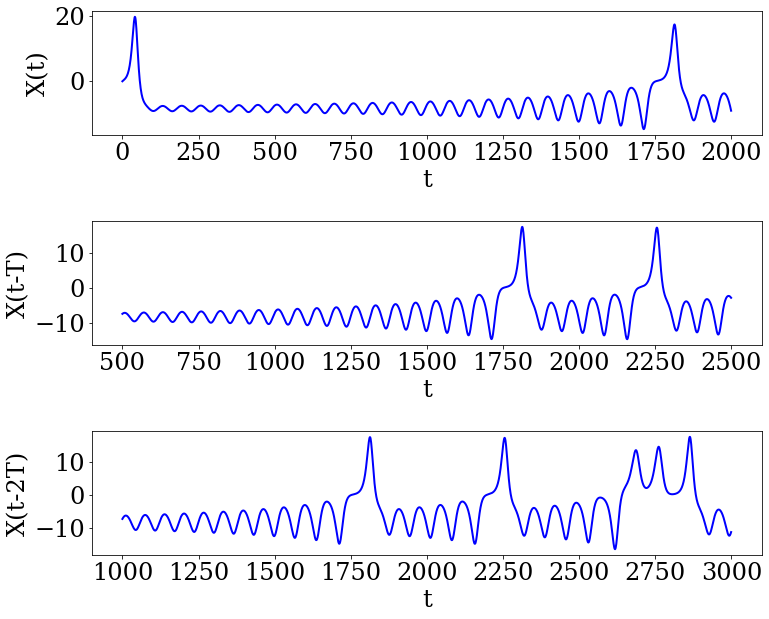

In [ ]:
T=500
fig, ax = plt.subplots(3, 1, figsize=(12, 10))
ax[0].plot([i for i in range(3000-2*T)], track1[:-2*T,0], c='b')
ax[0].set_xlabel("t")
ax[0].set_ylabel("X(t)")
ax[1].plot([i for i in range(T,3000-T)], track1[T:-T,0], c='b')
ax[1].set_xlabel("t")
ax[1].set_ylabel("X(t-T)")
ax[2].plot([i for i in range(2*T,3000)], track1[2*T:,0], c='b')
ax[2].set_xlabel("t")
ax[2].set_ylabel("X(t-2T)")
plt.subplots_adjust(hspace=0.7)
# plt.savefig('ts_x.png')
plt.show()

ValueError: ignored

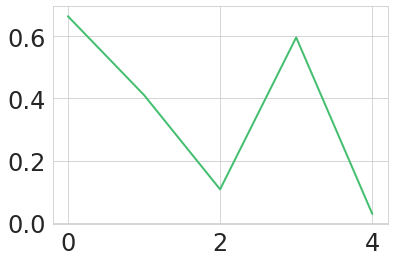

In [ ]:
import re
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import shutil
import os
sns.set_style('whitegrid')

returnavg = [0.664,  0.411,  0.108,  0.596,  0.029]
r1 = returnavg + [-0.01, -0.33, -0.13, -0.02, -0.14]
r2 = returnavg + [0.01, 0.33, 0.13, 0.02, 0.14]

color = cm.viridis(0.7)
f, ax = plt.subplots(1,1)
ax.plot(np.arange(5), returnavg, color=color)
ax.fill_between(np.arange(5), r1, r2, color=color, alpha=0.2)
ax.legend()
ax.set_xlabel('Iteration')
ax.set_ylabel('Return')
exp_dir = 'Plot/'
if not os.path.exists(exp_dir):
    os.makedirs(exp_dir, exist_ok=True)
f.savefig(os.path.join('Plot', 'avgreward' + '.png'), dpi=50)

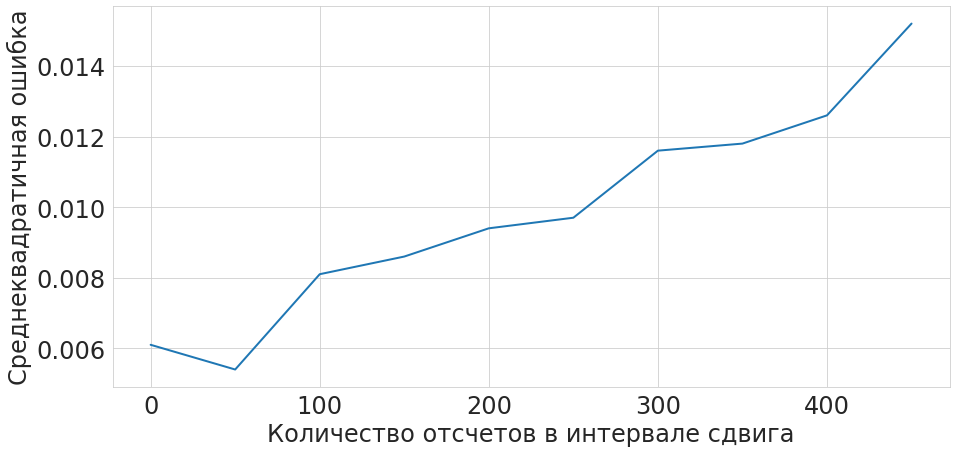

In [ ]:
plt.figure(figsize=(15, 7))
corr = [0.0061, 0.0054, 0.0081, 0.0086, 0.0094, 0.0097, 0.0116, 0.0118, 0.0126, 0.0152]
plt.plot(np.arange(0, 500, 50), corr)
plt.xlabel("Количество отсчетов в интервале сдвига")
plt.ylabel("Среднеквадратичная ошибка")
plt.savefig('delay.png')
plt.show()